# Importing Libaries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn

Importing Dataset

In [ ]:
db_train = pd.read_csv("train.csv")
db_test = pd.read_csv("test.csv")
print(db_train.head())
print(db_test.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

Data Cleaning

In [ ]:
db_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
db_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
db_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
db_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Removing Null Values from Age

In [ ]:
db_train["Age"].fillna(db_train["Age"].mean(),inplace=True)
db_test["Age"].fillna(db_test["Age"].mean(),inplace=True)

Removing Null values from Embarked

In [ ]:
db_train["Embarked"].value_counts() #Giving Maximum

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
db_train["Embarked"].fillna("S",inplace=True)
db_test["Embarked"].fillna("S",inplace=True)

In [ ]:
db_test["Embarked"].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

Dropping Unnnessary Features

In [ ]:
db_train = db_train.drop(["Name","Ticket","Fare","Cabin"],axis=1)
db_test = db_test.drop(["Name","Ticket","Fare","Cabin"],axis=1)

# EDA

In [ ]:
db_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000


In [ ]:
db_train.shape

(891, 8)

0    549
1    342
Name: Survived, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


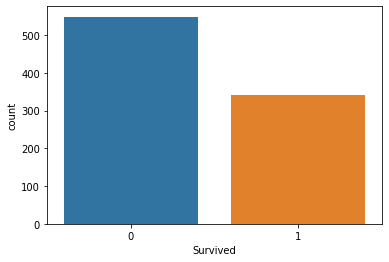

In [ ]:
sns.countplot(db_train['Survived'])
print(db_train['Survived'].value_counts())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80ded89df0>,
      dtype=object)

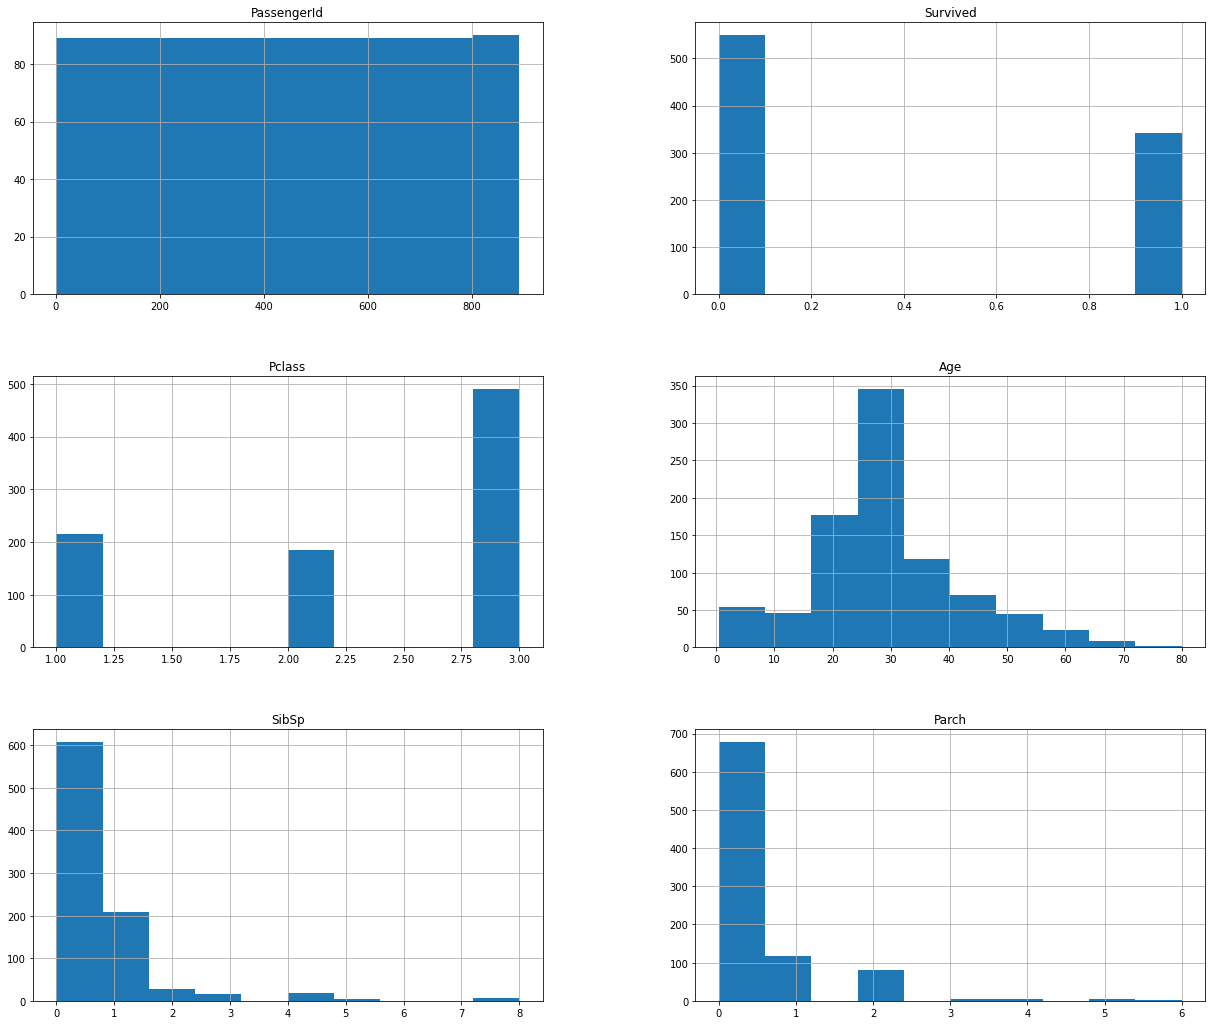

In [ ]:
db_train.hist(figsize=(21,18))

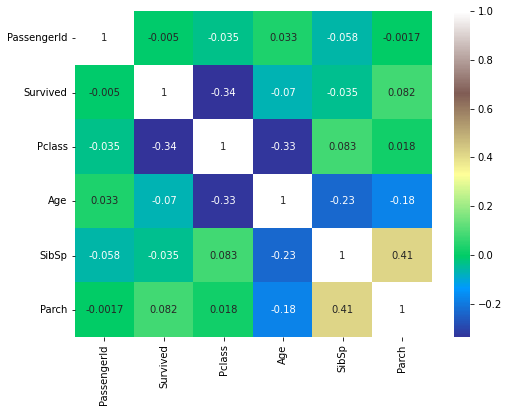

In [ ]:
sns.heatmap(db_train.corr(),annot=True,cmap='terrain')
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.show()

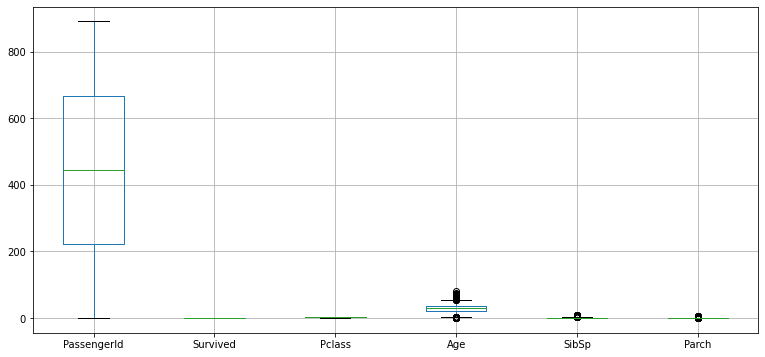

In [ ]:
db_train.boxplot(figsize=(13,6))
plt.show()

In [ ]:
db_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(db_train['Sex'].unique())
db_train['Sex'] = le.transform(db_train['Sex'])
db_test['Sex'] = le.transform(db_test['Sex'])

In [ ]:
db_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,22.0,1,0,S
1,2,1,1,0,38.0,1,0,C
2,3,1,3,0,26.0,0,0,S
3,4,1,1,0,35.0,1,0,S
4,5,0,3,1,35.0,0,0,S


In [ ]:
le1 = LabelEncoder()
le1.fit(db_train['Embarked'].unique())
db_train['Embarked'] = le1.transform(db_train['Embarked'])
db_test['Embarked'] = le1.transform(db_test['Embarked'])
db_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,22.0,1,0,2
1,2,1,1,0,38.0,1,0,0
2,3,1,3,0,26.0,0,0,2
3,4,1,1,0,35.0,1,0,2
4,5,0,3,1,35.0,0,0,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80df30c8b0>,
      dtype=object)

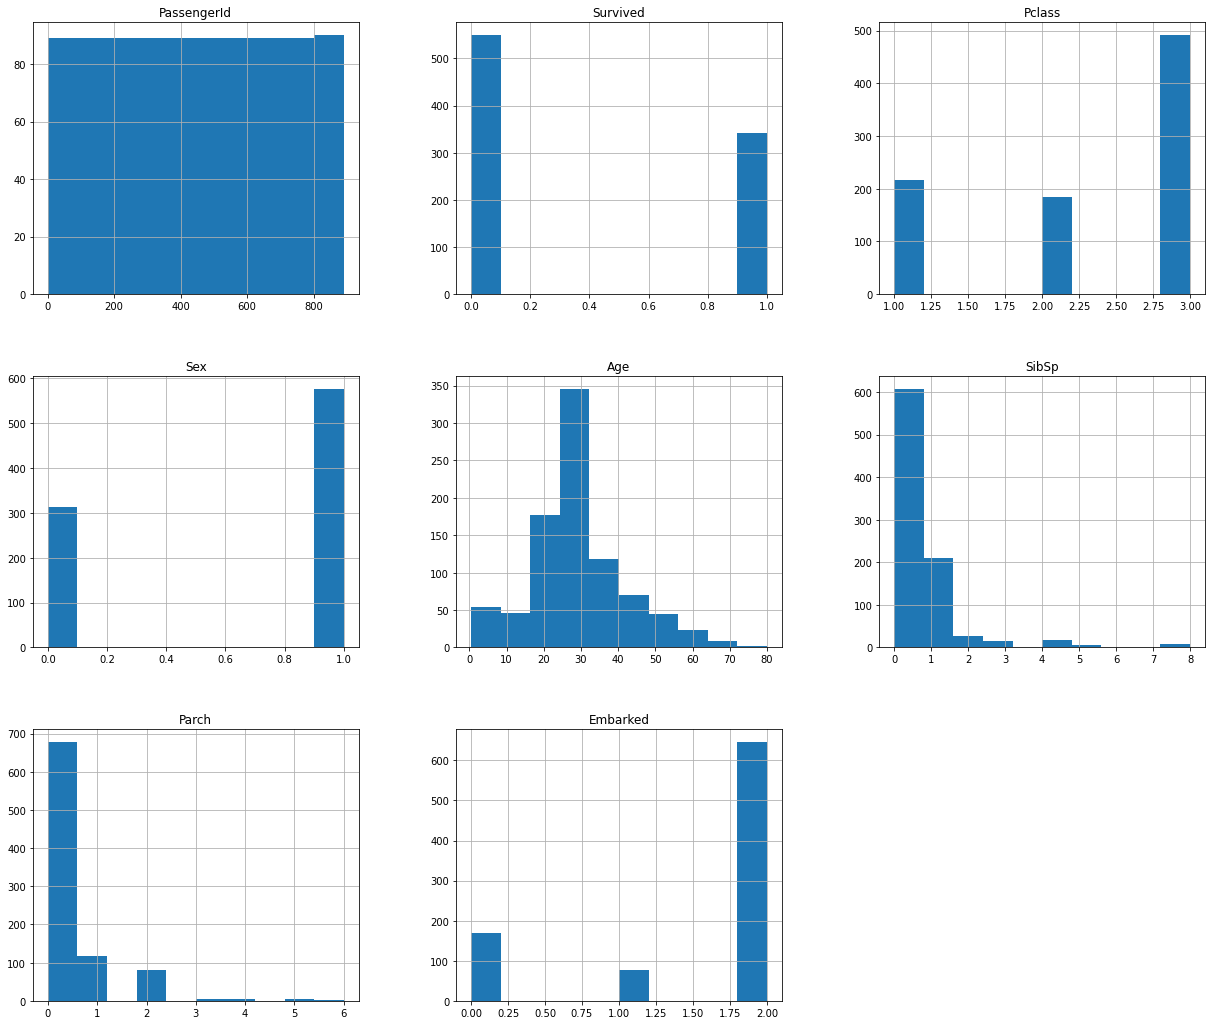

In [ ]:
db_train.hist(figsize=(21,18))

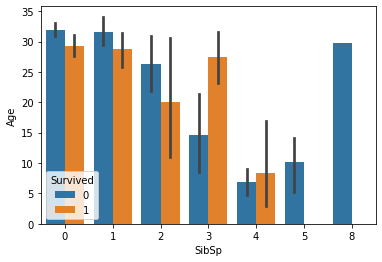

In [ ]:
sns.barplot(x=db_train['SibSp'],y=db_train['Age'],hue=db_train['Survived'])

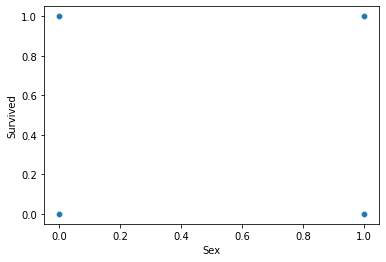

In [ ]:
sns.scatterplot(x=db_train['Sex'],y=db_train['Survived'])

In [ ]:
print(db_train.head())
print(db_test.head())
y = db_train['Survived']
X = db_train.drop(['PassengerId','Survived'],axis=1)
passender_id_test = db_test['PassengerId']
X_test_test = db_test.drop(['PassengerId'],axis=1)

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch  Embarked
0            1         0       3    1  22.0      1      0         2
1            2         1       1    0  38.0      1      0         0
2            3         1       3    0  26.0      0      0         2
3            4         1       1    0  35.0      1      0         2
4            5         0       3    1  35.0      0      0         2
   PassengerId  Pclass  Sex   Age  SibSp  Parch  Embarked
0          892       3    1  34.5      0      0         1
1          893       3    0  47.0      1      0         2
2          894       2    1  62.0      0      0         1
3          895       3    1  27.0      0      0         2
4          896       3    0  22.0      1      1         2


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

# Model Training

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print('Decision Tree')
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

#KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)
y_pred_knn = knn_model.predict(X_test)
print('KNN')
print(accuracy_score(y_pred_knn,y_test))
print(confusion_matrix(y_pred_knn,y_test))

#SVM
svc = SVC()
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
print('SVM')
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred_svc,y_test))

#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
print('Logistic Regression')
print(accuracy_score(y_pred_lr,y_test))
print(confusion_matrix(y_pred_lr,y_test))

#Native Bays
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)
print('Native Bays')
print(accuracy_score(y_pred_nb,y_test))
print(confusion_matrix(y_pred_nb,y_test))

#Random Forest
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest')
print(accuracy_score(y_pred_rf,y_test))
print(confusion_matrix(y_pred_rf,y_test))

Decision Tree
0.7932960893854749
[[93 20]
 [17 49]]
KNN
0.770949720670391
[[96 27]
 [14 42]]
SVM
0.7932960893854749
[[109  61]
 [  1   8]]
Logistic Regression
0.7877094972067039
[[92 20]
 [18 49]]
Native Bays
0.7541899441340782
[[85 19]
 [25 50]]
Random Forest
0.8156424581005587
[[92 15]
 [18 54]]


In [ ]:
#Random Forest is best algorithm
y_pred_test = rf.predict(X_test_test)
np.unique(y_pred_test,return_counts=True)

(array([0, 1]), array([273, 145]))

In [ ]:
db_test['Survived'] = y_pred_test
ratio = db_test.groupby('Pclass')['Survived'].mean()
print(ratio)

Pclass
1    0.672897
2    0.333333
3    0.192661
Name: Survived, dtype: float64
